In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/metrics.csv")
df.head()

,prompt_restrict,numbered,retriever_k,classtest/YesNo/exact_match,classtest/Date/exact_match,classtest/Numeric/exact_match,classtest/Person/exact_match,classtest/Organization/exact_match,classtest/Location/exact_match,hop/OneHop/exact_match,...,class/Numeric/answer_recall,class/Person/exact_match,class/Person/macro_f1,class/Person/answer_recall,class/Organization/exact_match,class/Organization/macro_f1,class/Organization/answer_recall,class/Location/exact_match,class/Location/macro_f1,class/Location/answer_recall
0,none,True,0,0.542857,0.0,0.8125,0.192308,0.0,0.000000,8.411215,...,15.625,0.0,1.282051,7.692308,0.0,6.427404,23.833333,0.0,2.447665,22.222222
1,none,True,1,0.342857,0.0,0.8750,0.000000,0.0,0.111111,6.542056,...,15.625,0.0,5.484878,26.923077,0.0,9.592721,26.833333,0.0,5.783476,33.333333
2,none,True,2,0.200000,0.0,0.8750,0.038462,0.0,0.000000,3.738318,...,28.125,0.0,8.032232,40.384615,0.0,17.686028,59.500000,0.0,5.113501,38.888889
3,none,True,3,0.285714,0.0,0.8750,0.000000,0.0,0.000000,3.738318,...,21.875,0.0,8.447028,40.384615,0.0,17.083089,57.000000,0.0,4.398148,27.777778
4,none,True,4,0.285714,0.0,0.9375,0.000000,0.0,0.000000,4.672897,...,28.125,0.0,7.831251,36.538462,0.0,18.188551,57.000000,0.0,4.357298,27.777778


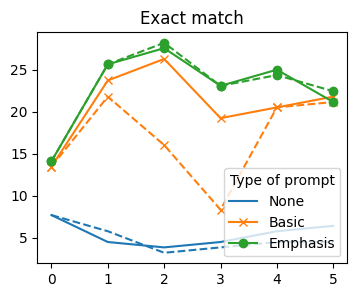

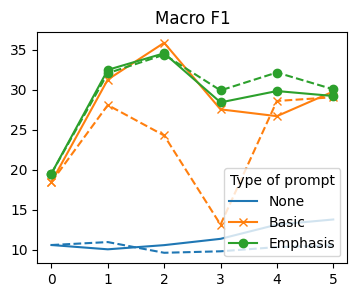

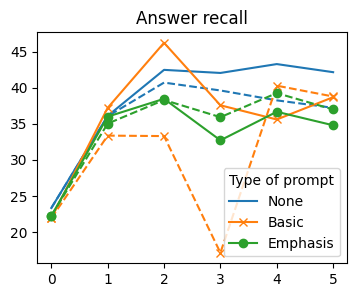

In [3]:
for metric in ("exact_match", "macro_f1", "answer_recall"):
    plt.figure(figsize=(4, 3))
    plt.title(metric.replace("_", " ").capitalize().replace("f1", "F1"))
    for i, prompt_restrict in enumerate(("none", "basic", "emphasis")):
        for numbered in (False, True):
            plt.plot(
                range(6),
                df[(df.prompt_restrict == prompt_restrict) & (df.numbered == numbered)].sort_values("retriever_k")[f"overall/{metric}"],
                c=f"C{i}",
                linestyle="--" if numbered else "-",
                label=None if numbered else prompt_restrict.capitalize(),
                marker={"none": None, "basic": "x", "emphasis": "o"}[prompt_restrict],
            )
            if numbered:
                plt.legend(title="Type of prompt", loc="lower right")
            # plt.xlabel("# of docs used for context")
            plt.savefig(f"figs/{metric}.pdf", bbox_inches="tight")

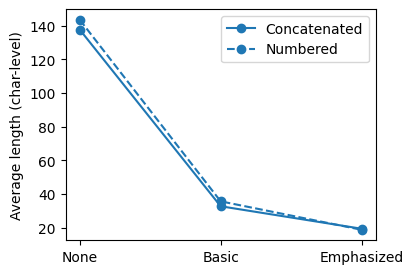

In [4]:
plt.figure(figsize=(4, 3))
plt.plot(["None", "Basic", "Emphasized"], df[(df.numbered == False) & (df.retriever_k == 2)][["overall/char_length"]], "o-", c="C0", label="Concatenated")
plt.plot(["None", "Basic", "Emphasized"], df[(df.numbered == True) & (df.retriever_k == 2)][["overall/char_length"]], "o--", c="C0", label="Numbered")
plt.ylabel("Average length (char-level)")
plt.legend()

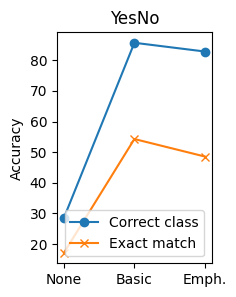

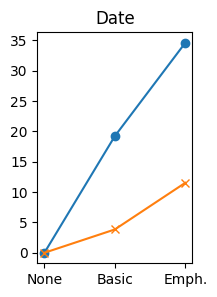

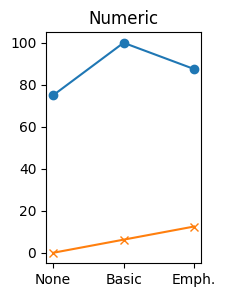

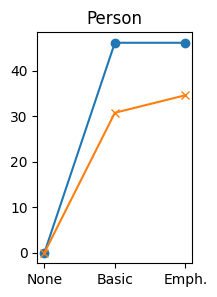

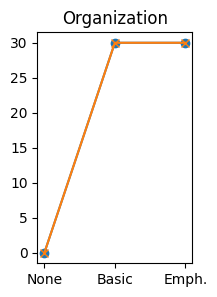

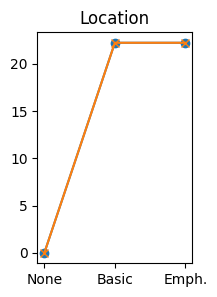

In [5]:
for key in df.keys():
    if "classtest" in key:
        plt.figure(figsize=(2, 3))
        plt.plot(
            ["None", "Basic", "Emph."],
            df[(df.numbered == False) & (df.retriever_k == 2)][key] * 100,
            "o-",
            label="Correct class"
        )
        plt.plot(
            ["None", "Basic", "Emph."],
            df[(df.numbered == False) & (df.retriever_k == 2)][key.replace("classtest", "class")],
            "x-",
            label="Exact match"
        )
        if "YesNo" in key:
            plt.ylabel("Accuracy")
            plt.legend(loc="lower center")
        plt.title(key.split("/")[1])
        plt.savefig(f"figs/classwise_{key.split('/')[1]}.pdf", bbox_inches="tight")            

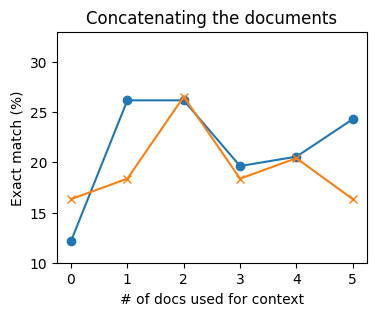

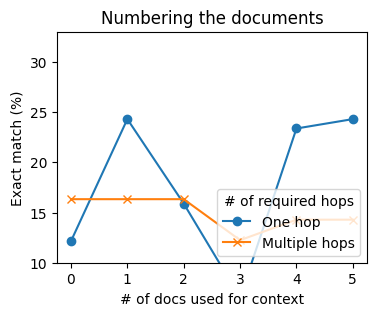

In [6]:
for numbered in (False, True):
    plt.figure(figsize=(4, 3))
    for key, name, marker in (("hop/OneHop/exact_match", "One hop", "o"), ("hop/MultiHop/exact_match", "Multiple hops", "x"),):
        plt.plot(range(6), df[(df.prompt_restrict == "basic") & (df.numbered == numbered)].sort_values("retriever_k")[key], label=name, marker=marker)
    if numbered:
        plt.legend(title="# of required hops", loc="lower right")
    plt.xlabel("# of docs used for context")
    plt.ylabel("Exact match (%)")
    plt.title("Numbering the documents" if numbered else "Concatenating the documents")
    plt.ylim(10, 33)
    plt.savefig(f"figs/hop_numbered_{numbered}.pdf", bbox_inches="tight")

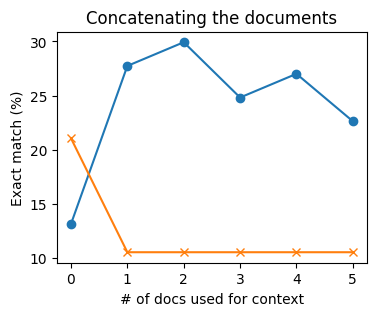

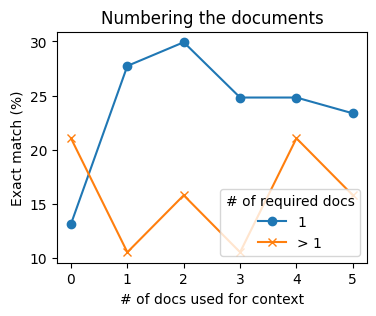

In [7]:
for numbered in (False, True):
    plt.figure(figsize=(4, 3))
    for key, name, marker in (("topic/single/exact_match", "1", "o"), ("topic/multi/exact_match", "> 1", "x"),):
        plt.plot(range(6), df[(df.prompt_restrict == "emphasis") & (df.numbered == numbered)].sort_values("retriever_k")[key], label=name, marker=marker)
    if numbered:
        plt.legend(title="# of required docs", loc="lower right")
    plt.xlabel("# of docs used for context")
    plt.ylabel("Exact match (%)")
    plt.title("Numbering the documents" if numbered else "Concatenating the documents")
    plt.savefig(f"figs/numdocs_numbered_{numbered}.pdf", bbox_inches="tight")
    plt.show()